# Evaluating an N-Gram Language Model



In [1]:
from n_gram import NGramLM, load_corpus
import matplotlib.pyplot as plt
import math

BOS = '<BOS>'
EOS = '<EOS>'
OOV = '<OOV>'

# Load pre-built n-gram languae models
model_unigram = NGramLM('arthur-conan-doyle.tok.train.n1.pkl', .01, verbose=True)
model_bigram = NGramLM('arthur-conan-doyle.tok.train.n2.pkl', .01)
model_trigram = NGramLM('arthur-conan-doyle.tok.train.n3.pkl', .01)
model_4gram = NGramLM('arthur-conan-doyle.tok.train.n4.pkl', .01)
model_5gram = NGramLM('arthur-conan-doyle.tok.train.n5.pkl', .01)

Now it's time to see how well these models fit our data! We'll use Perplexity for this calculation, but it's up to you to implement it below.

Recall the formula for perplexity from the lecture:

$$
perplexity = 2^{\frac{-1}{n}\sum \log_2(P(w_i|w_{<i}))}
$$

Hint: you'll want to use the [`math.log2`](https://docs.python.org/3/library/math.html#math.log2) function

In [2]:
def perplexity(model: NGramLM, texts: list[tuple[str]]) -> float:
    n_word = sum(len(text) for text in texts)
    try:
        res = sum(
            math.log2(model.get_prob(text[:i], text[i]))
            for text in texts
            for i in range(len(text))
        )
    except :
        res = -1e6 # If we encounter an OOV, we set the perplexity to a large number?
    return math.pow(2, -1 / n_word * res)


model_unigram.verbose = True
print(perplexity(model_unigram, [('My', 'dear', 'Watson', '.'), ('Come', 'over', 'here', '!')]))
model_unigram.verbose = False

0.0006603 -> My
5.955e-05 My -> dear
5.955e-05 My dear -> Watson
5.955e-05 My dear Watson -> .
0.0001687 -> Come
5.955e-05 Come -> over
5.955e-05 Come over -> here
5.955e-05 Come over here -> !
10914.060522177839


In [3]:
# Tests
assert round(perplexity(model_unigram, [('My', 'dear', 'Watson')])) == 7531
assert round(perplexity(model_bigram, [('My', 'dear', 'Watson')])) == 24
assert round(perplexity(model_trigram, [('My', 'dear', 'Watson')])) == 521

Now let's see how well the model fits a held-out test set.

The test data covers a few of the stories, and represents about 12% of the total data.

In [4]:
toks_test = load_corpus('arthur-conan-doyle.tok.test.txt')

print("1Gram: {}".format(perplexity(model_unigram, toks_test)))
print("2Gram: {}".format(perplexity(model_bigram, toks_test)))
print("3Gram: {}".format(perplexity(model_trigram, toks_test)))
print("4Gram: {}".format(perplexity(model_4gram, toks_test)))
print("5Gram: {}".format(perplexity(model_5gram, toks_test)))

1Gram: 14924.231775682032
2Gram: 259.53894955493575
3Gram: 1306.5535359617168
4Gram: 4921.800243753726
5Gram: 8463.320537423433


You should see that the perplexity for the bigram model is lower than the others. What does this indicate?

> Remember it's a bad idea to determine the quality of a model based on the perplexity of data that was used for training. Below, evaluate the same five models using the training data.

In [5]:
toks_train = load_corpus('arthur-conan-doyle.tok.train.txt')

print("1Gram: {}".format(perplexity(model_unigram, toks_train)))
print("2Gram: {}".format(perplexity(model_bigram, toks_train)))
print("3Gram: {}".format(perplexity(model_trigram, toks_train)))
print("4Gram: {}".format(perplexity(model_4gram, toks_train)))
print("5Gram: {}".format(perplexity(model_5gram, toks_train)))

1Gram: 14976.720311453284
2Gram: 89.24191939090886
3Gram: 91.85929869314299
4Gram: 121.15467462888681
5Gram: 137.07146227675707


You should see that you get much lower perplexities when measuring on the training data, especially for the models with larger values of `n`. This suggests that the model is over-fitting to the training data.

In [6]:
ngrams = [1, 2, 3, 4, 5]
models = [model_unigram, model_bigram, model_trigram, model_4gram, model_5gram]
models_s0 = [
    NGramLM('arthur-conan-doyle.tok.train.n1.pkl', 0),
    NGramLM('arthur-conan-doyle.tok.train.n2.pkl', 0),
    NGramLM('arthur-conan-doyle.tok.train.n3.pkl', 0),
    NGramLM('arthur-conan-doyle.tok.train.n4.pkl', 0),
    NGramLM('arthur-conan-doyle.tok.train.n5.pkl', 0)]

In [7]:
perplexities = [perplexity(model, toks_test) for model in models]
perplexities_s0 = [perplexity(model, toks_test) for model in models_s0]

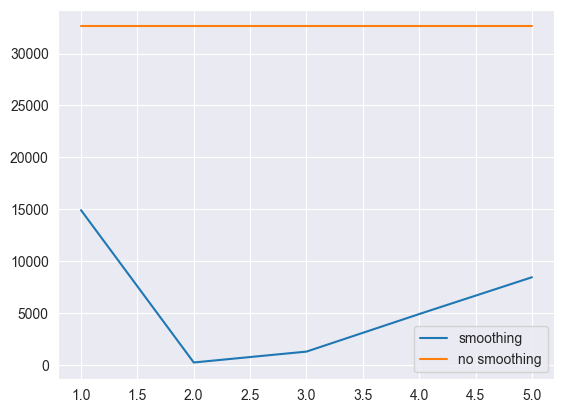

In [8]:
plt.plot(ngrams, perplexities, label='smoothing')
plt.plot(ngrams, perplexities_s0, label='no smoothing')
plt.legend()
plt.show()